In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway

In [2]:
pd.set_option('display.max_columns', None)

#Import data
df = pd.read_csv('sleep_health_data.csv')
df['Person ID'] = df['Person ID'].astype(str)

# Display first 5 rows
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# EDA

In [3]:
# Checking for missing values in the dataset
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [4]:
# Checking the distribution of numerical columns
numerical_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
df[numerical_columns].describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
# Checking the distribution of categorical columns
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
df[categorical_columns].nunique()

Gender             2
Occupation        11
BMI Category       3
Blood Pressure    25
Sleep Disorder     2
dtype: int64

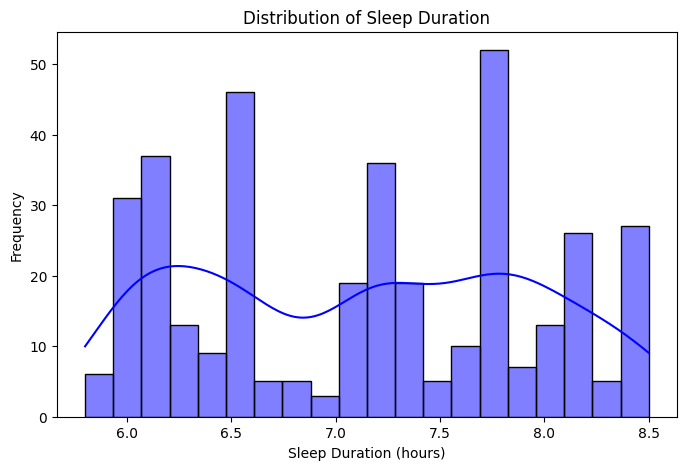

In [6]:
# Visualizing the distribution of Sleep Duration
plt.figure(figsize=(8, 5))
sns.histplot(df['Sleep Duration'], kde=True, bins=20, color='blue')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

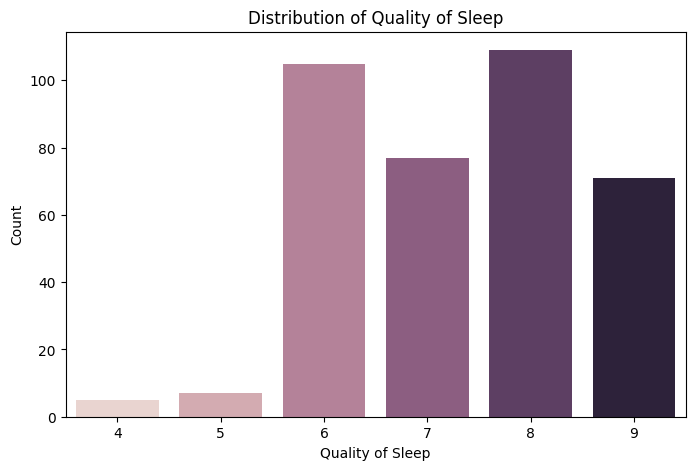

In [7]:
# Visualizing the distribution of Quality of Sleep
plt.figure(figsize=(8, 5))
sns.countplot(x='Quality of Sleep', data=df, hue="Quality of Sleep", legend=False)
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.show()

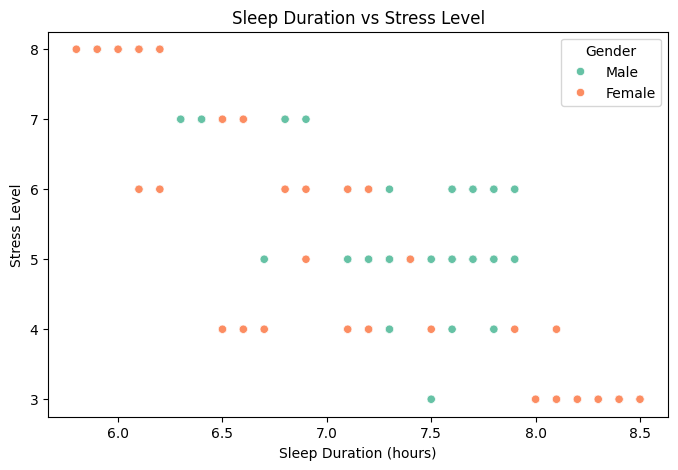

In [8]:
# Visualizing the relationship between Sleep Duration and Stress Level
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sleep Duration', y='Stress Level', data=df, hue='Gender', palette='Set2')
plt.title('Sleep Duration vs Stress Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')
plt.legend(title='Gender')
plt.show()

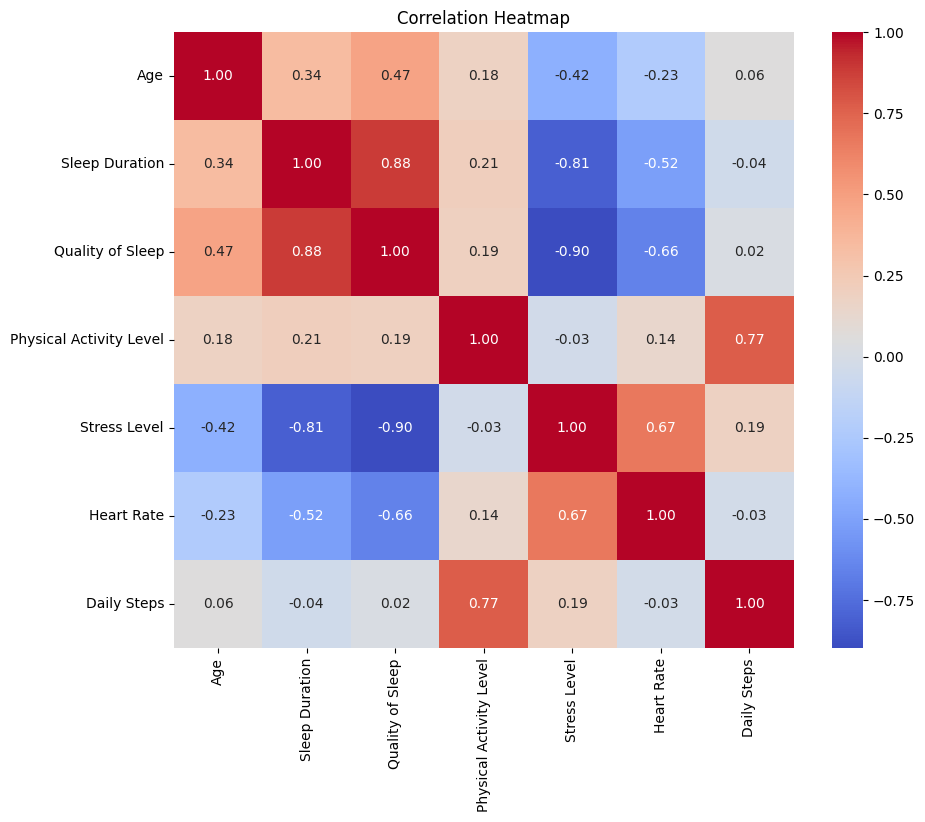

In [9]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

/tmp/ipykernel_548/3045709590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sleep Disorder', data=df, palette='pastel')


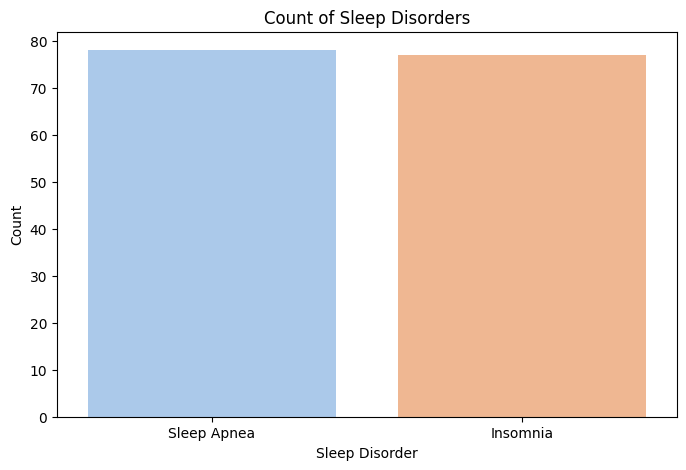

In [10]:
# Analyzing the count of Sleep Disorders
plt.figure(figsize=(8, 5))
sns.countplot(x='Sleep Disorder', data=df, palette='pastel')
plt.title('Count of Sleep Disorders')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()

# Gender

In [11]:
# Calculate the mean quality of sleep for each gender
mean_quality_of_sleep_gender = df.groupby('Gender')['Quality of Sleep'].mean().sort_values()
mean_quality_of_sleep_gender

Gender
Male      6.968254
Female    7.664865
Name: Quality of Sleep, dtype: float64

In [12]:
# Perform one-way ANOVA for sleep quality across different genders
anova_result = f_oneway(df[df['Gender'] == 'Male']['Quality of Sleep'],
                        df[df['Gender'] == 'Female']['Quality of Sleep'])
anova_result

F_onewayResult(statistic=34.510311389862665, pvalue=9.416446532689026e-09)

The one-way ANOVA test shows a significant difference in sleep quality across genders (F-statistic = 34.51, p-value < 0.00000001). This indicates that gender has a statistically significant effect on sleep quality.

In [13]:
# Group data by Gender and Sleep Disorder
gender_sleep_disorder_analysis = df.groupby(['Gender', 'Sleep Disorder']).size().unstack(fill_value=0)

# Calculate the percentage of each sleep disorder within each gender
gender_sleep_disorder_percentages = gender_sleep_disorder_analysis.div(gender_sleep_disorder_analysis.sum(axis=1), axis=0) * 100

gender_sleep_disorder_analysis

Sleep Disorder,Insomnia,Sleep Apnea
Gender,,
Female,36,67
Male,41,11


In [14]:
gender_sleep_disorder_percentages

Sleep Disorder,Insomnia,Sleep Apnea
Gender,,
Female,34.951456,65.048544
Male,78.846154,21.153846


# Age

In [15]:
# Calculate the mean quality of sleep for each age group
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-30', '30-40', '40-50', '50-60']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
mean_quality_of_sleep_age_group = df.groupby('Age Group')['Quality of Sleep'].mean().sort_values()
mean_quality_of_sleep_age_group

/tmp/ipykernel_548/2456166014.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_quality_of_sleep_age_group = df.groupby('Age Group')['Quality of Sleep'].mean().sort_values()


Age Group
20-30    5.789474
40-50    6.965812
30-40    7.225352
50-60    8.166667
Name: Quality of Sleep, dtype: float64

In [16]:
# Creating age groups
bins = [20, 30, 40, 50, 60]
labels = ['20-30', '30-40', '40-50', '50-60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Perform one-way ANOVA for sleep quality across different age groups
anova_age_result = f_oneway(
    df[df['Age Group'] == '20-30']['Quality of Sleep'],
    df[df['Age Group'] == '30-40']['Quality of Sleep'],
    df[df['Age Group'] == '40-50']['Quality of Sleep'],
    df[df['Age Group'] == '50-60']['Quality of Sleep']
)
anova_age_result

F_onewayResult(statistic=39.347748609043975, pvalue=4.3137760570037e-22)

The one-way ANOVA test shows a significant difference in sleep quality across different age groups (F-statistic = 39.35, p-value < 0.0000000000000000001). This indicates that age group has a statistically significant effect on sleep quality.

In [17]:
# Group data by Age Group and Sleep Disorder
age_group_sleep_disorder_analysis = df.groupby(['Age Group', 'Sleep Disorder']).size().unstack(fill_value=0)

# Display the analysis
age_group_sleep_disorder_analysis

/tmp/ipykernel_548/3658553728.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sleep_disorder_analysis = df.groupby(['Age Group', 'Sleep Disorder']).size().unstack(fill_value=0)


Sleep Disorder,Insomnia,Sleep Apnea
Age Group,,
20-30,3,4
30-40,6,9
40-50,60,15
50-60,8,50


In [18]:
# Calculate the percentage of each sleep disorder within each age group
age_group_sleep_disorder_percentages = age_group_sleep_disorder_analysis.div(age_group_sleep_disorder_analysis.sum(axis=1), axis=0) * 100

# Display the percentages
age_group_sleep_disorder_percentages

Sleep Disorder,Insomnia,Sleep Apnea
Age Group,,
20-30,42.857143,57.142857
30-40,40.000000,60.000000
40-50,80.000000,20.000000
50-60,13.793103,86.206897


# Occupation affects in Sleep Health

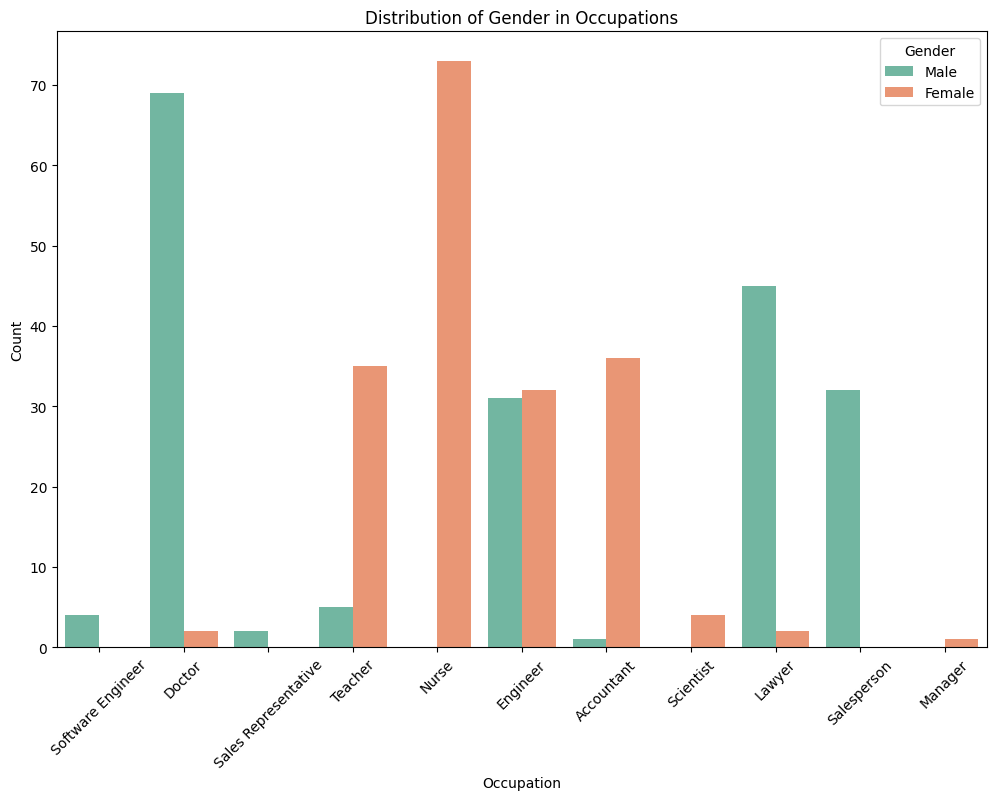

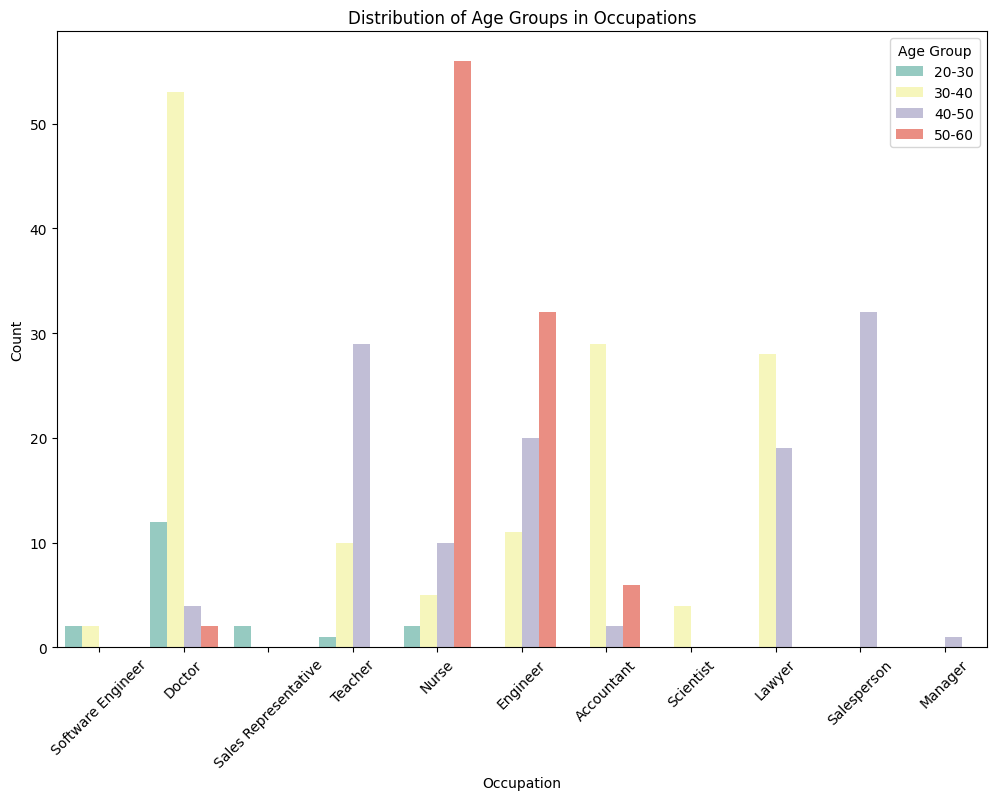

In [19]:
# Visualizing the distribution of gender and age in occupation
plt.figure(figsize=(12, 8))
sns.countplot(x='Occupation', hue='Gender', data=df, palette='Set2')
plt.title('Distribution of Gender in Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='Occupation', hue='Age Group', data=df, palette='Set3')
plt.title('Distribution of Age Groups in Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

/tmp/ipykernel_548/2739102556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Sleep Duration', data=df, palette='coolwarm')


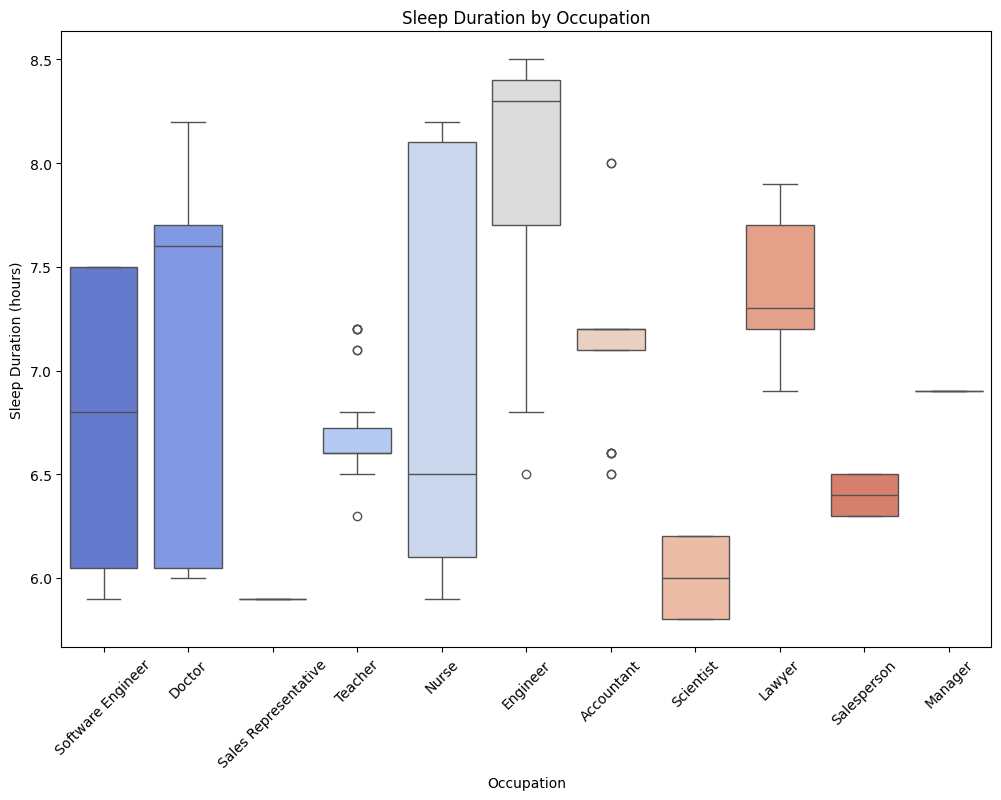

/tmp/ipykernel_548/2739102556.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Stress Level', data=df, palette='coolwarm')


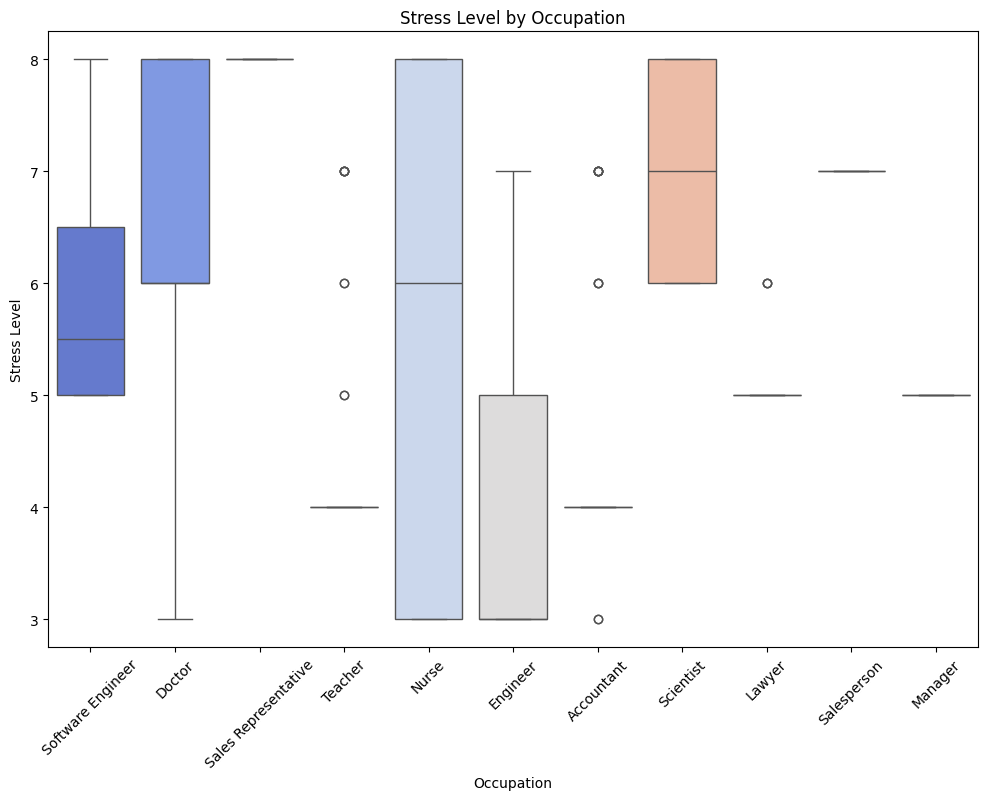

/tmp/ipykernel_548/2739102556.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Quality of Sleep', data=df, palette='coolwarm')


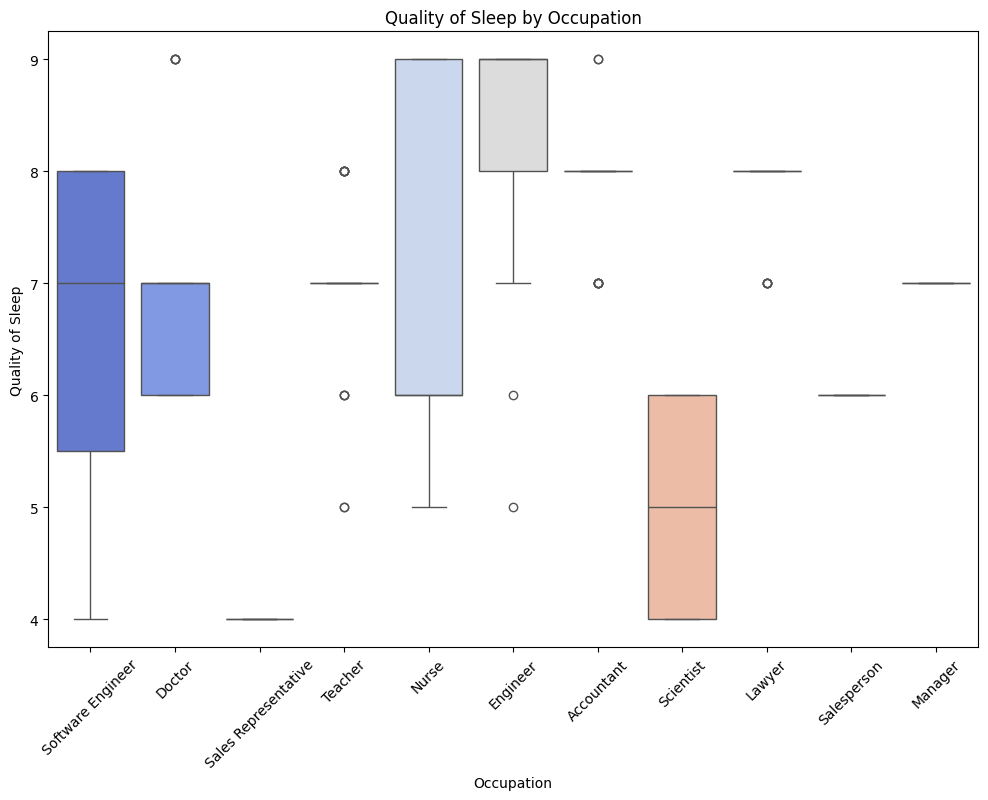

In [20]:
# Visualizing Sleep Duration, Stress Level, and Sleep Quality by Occupation
plt.figure(figsize=(12, 8))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df, palette='coolwarm')
plt.title('Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Occupation', y='Stress Level', data=df, palette='coolwarm')
plt.title('Stress Level by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Stress Level')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Occupation', y='Quality of Sleep', data=df, palette='coolwarm')
plt.title('Quality of Sleep by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Quality of Sleep')
plt.xticks(rotation=45)
plt.show()

In [21]:
sleep_duration_occ = df.groupby('Occupation')['Sleep Duration'].mean()
lowest_sleep_duration = sleep_duration_occ.idxmin()

lowest_sleep_duration

'Sales Representative'

In [22]:
sleep_quality_occ = df.groupby('Occupation')['Quality of Sleep'].mean()
lowest_sleep_quality_occ = sleep_quality_occ.idxmin()
lowest_sleep_quality_occ

'Sales Representative'

In [23]:
# Perform one-way ANOVA for sleep quality across different occupations
anova_occupation_result = f_oneway(
    *(df[df['Occupation'] == occupation]['Quality of Sleep'] for occupation in df['Occupation'].unique())
)
anova_occupation_result

F_onewayResult(statistic=30.022166662531067, pvalue=6.393556653659377e-42)

In [24]:
# Perform a deeper analysis of the relationship between Occupation and sleep disorders
# Group data by Occupation and Sleep Disorder
occupation_sleep_disorder_analysis = df.groupby(['Occupation', 'Sleep Disorder']).size().unstack(fill_value=0)

# Calculate the percentage of each sleep disorder within each occupation
occupation_sleep_disorder_percentages = occupation_sleep_disorder_analysis.div(occupation_sleep_disorder_analysis.sum(axis=1), axis=0) * 100

occupation_sleep_disorder_analysis, occupation_sleep_disorder_percentages

(Sleep Disorder        Insomnia  Sleep Apnea
 Occupation                                 
 Accountant                   7            0
 Doctor                       3            4
 Engineer                     5            1
 Lawyer                       2            3
 Nurse                        3           61
 Sales Representative         0            2
 Salesperson                 29            1
 Scientist                    0            2
 Software Engineer            1            0
 Teacher                     27            4,
 Sleep Disorder          Insomnia  Sleep Apnea
 Occupation                                   
 Accountant            100.000000     0.000000
 Doctor                 42.857143    57.142857
 Engineer               83.333333    16.666667
 Lawyer                 40.000000    60.000000
 Nurse                   4.687500    95.312500
 Sales Representative    0.000000   100.000000
 Salesperson            96.666667     3.333333
 Scientist               0.000000   

The analysis reveals the following relationship between Occupation and sleep disorders:

1. **Accountant**: 100% of cases are Insomnia.
2. **Doctor**: 42.86% of cases are Insomnia, and 57.14% are Sleep Apnea.
3. **Engineer**: 83.33% of cases are Insomnia, and 16.67% are Sleep Apnea.
4. **Lawyer**: 40% of cases are Insomnia, and 60% are Sleep Apnea.
5. **Nurse**: 4.69% of cases are Insomnia, and 95.31% are Sleep Apnea.
6. **Sales Representative**: 100% of cases are Sleep Apnea.
7. **Salesperson**: 96.67% of cases are Insomnia, and 3.33% are Sleep Apnea.
8. **Scientist**: 100% of cases are Sleep Apnea.
9. **Software Engineer**: 100% of cases are Insomnia.
10. **Teacher**: 87.10% of cases are Insomnia, and 12.90% are Sleep Apnea.

This indicates that certain occupations, such as Nurses and Sales Representatives, have a higher prevalence of Sleep Apnea, while others, like Software Engineers and Teachers, are more prone to Insomnia.

<Figure size 1200x800 with 0 Axes>

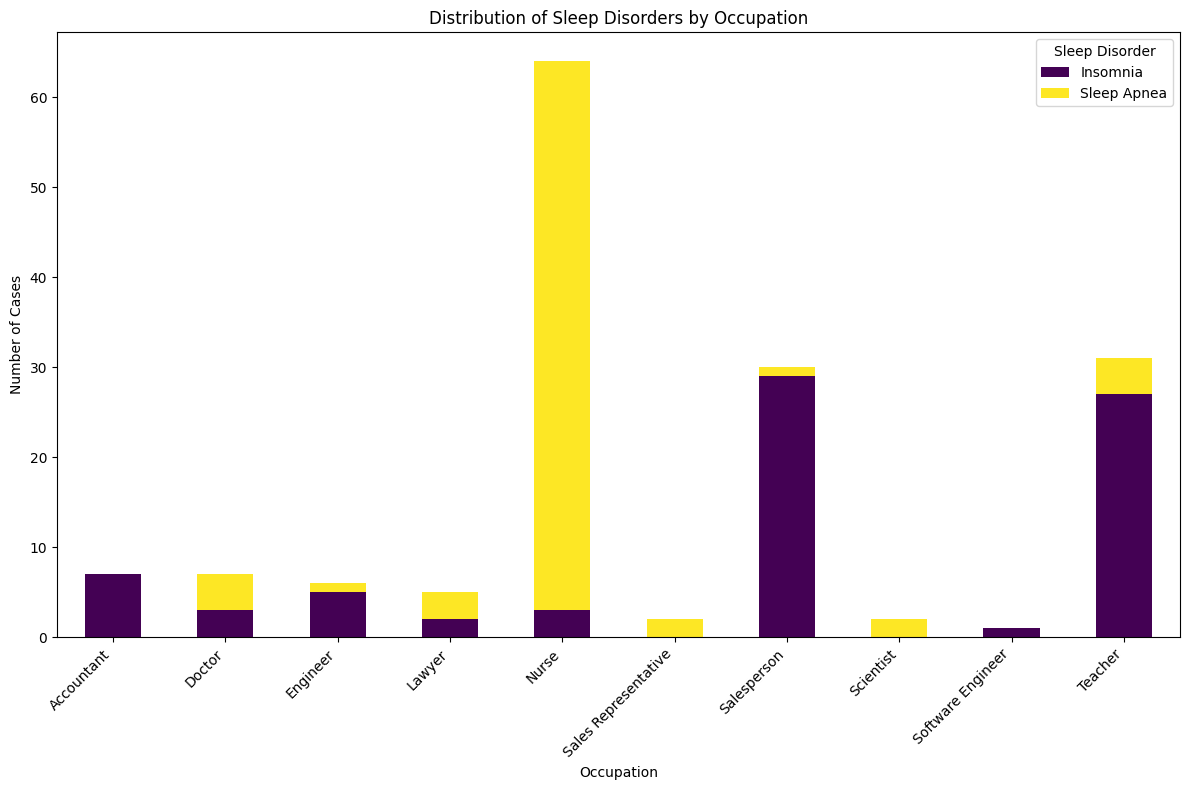

In [25]:
# Visualize the distribution of sleep disorders by occupation using a bar chart
plt.figure(figsize=(12, 8))
sleep_disorder_counts = df.groupby(['Occupation', 'Sleep Disorder']).size().unstack(fill_value=0)
sleep_disorder_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Distribution of Sleep Disorders by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Cases')
plt.legend(title='Sleep Disorder')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# BMI effects in Sleep Health

/tmp/ipykernel_548/6472526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BMI Category', y='Sleep Duration', palette='Set2')


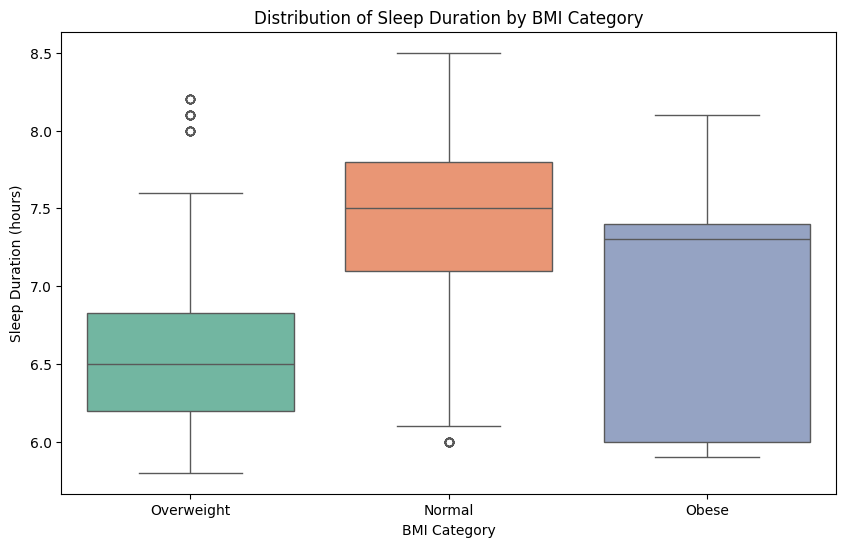

In [26]:
# Create a box plot to visualize the distribution of Sleep Duration by BMI Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BMI Category', y='Sleep Duration', palette='Set2')
plt.title('Distribution of Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

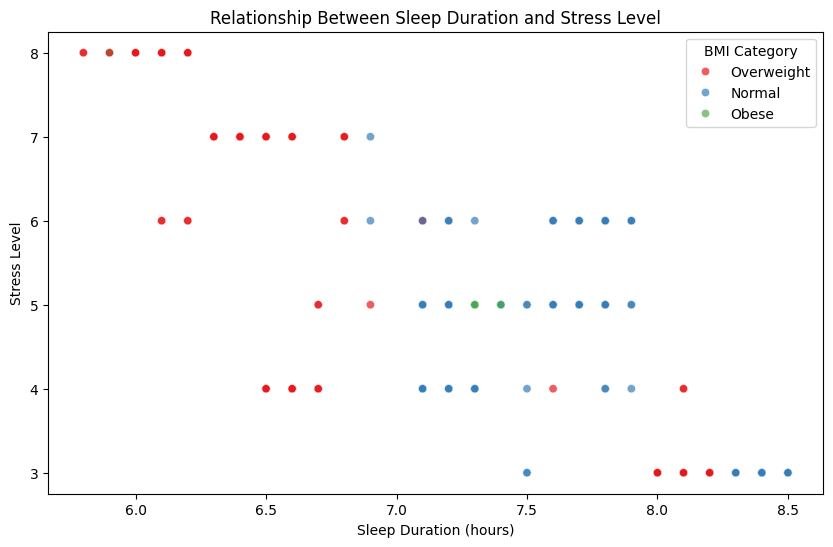

In [27]:
# Create a scatter plot to visualize the relationship between Sleep Duration and Stress Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sleep Duration', y='Stress Level', hue='BMI Category', palette='Set1', alpha=0.7)
plt.title('Relationship Between Sleep Duration and Stress Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')
plt.legend(title='BMI Category')
plt.show()

In [28]:
bmi_category_group = df.groupby("BMI Category")

bmi_insomnia_ratios = {
    "Normal": float,
    "Overweight": float,
    "Obese": float
}

for category, group in bmi_category_group:
    total_users = len(group)
    insomnia_cases = group[group['Sleep Disorder'] == "Sleep Apnea"].shape[0]
    ratio = round(insomnia_cases / total_users, 2)
    bmi_insomnia_ratios[category] = ratio
    
print(bmi_insomnia_ratios)

{'Normal': 0.03, 'Overweight': 0.44, 'Obese': 0.6}


In [29]:
bmi_category_group = df.groupby("BMI Category")

bmi_insomnia_ratios = {
    "Normal": float,
    "Overweight": float,
    "Obese": float
}

for category, group in bmi_category_group:
    total_users = len(group)
    insomnia_cases = group[group['Sleep Disorder'] == "Insomnia"].shape[0]
    ratio = round(insomnia_cases / total_users, 2)
    bmi_insomnia_ratios[category] = ratio
    
print(bmi_insomnia_ratios)

{'Normal': 0.04, 'Overweight': 0.43, 'Obese': 0.4}


In [30]:
# Perform a deeper analysis of the relationship between BMI and sleep disorders
# Group data by BMI Category and Sleep Disorder
bmi_sleep_disorder_analysis = df.groupby(['BMI Category', 'Sleep Disorder']).size().unstack(fill_value=0)

# Calculate the percentage of each sleep disorder within each BMI category
bmi_sleep_disorder_percentages = bmi_sleep_disorder_analysis.div(bmi_sleep_disorder_analysis.sum(axis=1), axis=0) * 100

bmi_sleep_disorder_analysis, bmi_sleep_disorder_percentages

(Sleep Disorder  Insomnia  Sleep Apnea
 BMI Category                         
 Normal                 9            7
 Obese                  4            6
 Overweight            64           65,
 Sleep Disorder   Insomnia  Sleep Apnea
 BMI Category                          
 Normal          56.250000    43.750000
 Obese           40.000000    60.000000
 Overweight      49.612403    50.387597)

Calculate the correlation between BMI Categories and Sleep Disorders.

In [31]:
# Encode BMI Category and Sleep Disorder into numerical values for correlation calculation
df_encoded = df.copy()
label_encoder = LabelEncoder()
df_encoded['BMI Category Encoded'] = label_encoder.fit_transform(df_encoded['BMI Category'])
df_encoded['Sleep Disorder Encoded'] = df_encoded['Sleep Disorder'].apply(lambda x: 1 if x == 'Sleep Apnea' else 0 if x == 'Insomnia' else None)

# Drop rows with NaN Sleep Disorder values since not all have disorders
df_encoded.dropna(subset=['Sleep Disorder Encoded'], inplace=True)

# Compute the correlation
correlation_bmi_sleep_disorder = df_encoded['BMI Category Encoded'].corr(df_encoded['Sleep Disorder Encoded'])
correlation_bmi_sleep_disorder

0.023051535534349275

In [32]:
# Filter only the rows where BMI Category is either 'Obese' or 'Overweight' and encode the Sleep Disorder column
subset_df = df_encoded[df_encoded['BMI Category'].isin(['Obese', 'Overweight'])]

# Compute the correlation between encoded Sleep Disorder and the filtered BMI Category
subset_df['BMI Category Encoded'] = label_encoder.fit_transform(subset_df['BMI Category'])

correlation_obese_overweight_sleep_disorder = subset_df['BMI Category Encoded'].corr(subset_df['Sleep Disorder Encoded'])
correlation_obese_overweight_sleep_disorder

/tmp/ipykernel_548/3425250817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['BMI Category Encoded'] = label_encoder.fit_transform(subset_df['BMI Category'])


-0.049687048461233944

In [33]:
# Perform one-way ANOVA for Quality of Sleep across different BMI categories
anova_bmi_result = f_oneway(
    df[df['BMI Category'] == 'Normal']['Quality of Sleep'],
    df[df['BMI Category'] == 'Overweight']['Quality of Sleep'],
    df[df['BMI Category'] == 'Obese']['Quality of Sleep']
)
anova_bmi_result

F_onewayResult(statistic=22.01139140051275, pvalue=9.257968894758679e-10)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7209bfa9-65d7-42ad-9e03-7f856072613f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>